# using trained model for sentiment (run after everything)

In [ ]:
!wget -O model.zip "https://www.dropbox.com/scl/fi/8ptc67u7xyuqt6rlnbrcf/saved_model.zip?rlkey=v62s0kwgiq0e9untttlf09059&st=f2k1lstl&dl=1"

--2025-02-04 18:33:37--  https://www.dropbox.com/scl/fi/8ptc67u7xyuqt6rlnbrcf/saved_model.zip?rlkey=v62s0kwgiq0e9untttlf09059&st=f2k1lstl&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8526b5603ebfe04bd2d17e9cda.dl.dropboxusercontent.com/cd/0/inline/Cjh_3EcC-TVuMWpHeuwlJtzZ6m15BCNTNeKV9Lf46LLR45DeuKGED9IvpViTWWAm4lDZHGiolkGZhc6O2jY_U-oO5qEd7CAxKeN2NqY_MsWsX4lx1Hjq-dYbCekBsi8RDYwq6oY6UWDJLZTMt480JK0H/file?dl=1# [following]
--2025-02-04 18:33:38--  https://uc8526b5603ebfe04bd2d17e9cda.dl.dropboxusercontent.com/cd/0/inline/Cjh_3EcC-TVuMWpHeuwlJtzZ6m15BCNTNeKV9Lf46LLR45DeuKGED9IvpViTWWAm4lDZHGiolkGZhc6O2jY_U-oO5qEd7CAxKeN2NqY_MsWsX4lx1Hjq-dYbCekBsi8RDYwq6oY6UWDJLZTMt480JK0H/file?dl=1
Resolving uc8526b5603ebfe04bd2d17e9cda.dl.dropboxusercontent.com (uc8526b5603ebfe04bd2d17e9cda.dl.dropboxuserconten

In [ ]:
!unzip -o "model.zip" -d "/content/m2"

Archive:  model.zip
  inflating: /content/m2/config.json  
  inflating: /content/m2/tokenizer_config.json  
  inflating: /content/m2/vocab.txt   
  inflating: /content/m2/model.safetensors  
  inflating: /content/m2/special_tokens_map.json  


In [ ]:
!pip install transformers

In [ ]:

# Directory where the model and tokenizer are saved
model_directory = "/content/m2"

from transformers import DistilBertForSequenceClassification, DistilBertTokenizer

tokenizer = DistilBertTokenizer.from_pretrained(model_directory)

model = DistilBertForSequenceClassification.from_pretrained(model_directory)

print("Model and tokenizer loaded successfully!")

Model and tokenizer loaded successfully!


In [ ]:
import json

filename = "data.json"

with open(filename, 'r') as json_file:
    data = json.load(json_file)

In [ ]:
data = topic_sentences_dict

In [ ]:
texts = data[list(data.keys())[5]]

In [ ]:
texts[0]

'As reminder subreddit [is civil discussion ] /r/politics/wiki/index wiki_be_civil In courteous Debate/discuss/argue merits ideas don attack people Personal insults shill troll accusations hate speech suggestion support harm violence death rule violations result permanent ban If comments violation rules please report For questions regarding media outlets posted subreddit please click [here] //www reddit com/r/politics/wiki/approveddomainslist review details approved domains list outlet criteria We actively looking moderators If helping subreddit quality discussion please fill [this form] //docs google com/forms/d/yswHDKXFhStGFjWkriuMjzcFqDIVwuvdLBjSA *** *I am bot action performed automatically Please [contact moderators subreddit] /message/compose/ to=/r/politics questions concerns *'

In [ ]:
import torch
import gc

final = []
batch_size = 16  # Process data in chunks

for x in list(data.keys()):
    print(x)
    texts = data[x]
    results = []
    count = 0

    while count < len(texts):
        print(f"Processing batch {count}...")

        # Slice the current batch correctly
        if count + batch_size > len(texts):
          inps = texts[count:len(texts)]
        else:
          inps = texts[count:count + batch_size]

        with torch.no_grad():
            inputs = tokenizer(inps, return_tensors="pt", padding=True, truncation=True)
            outputs = model(**inputs)
            logits = outputs.logits
            predicted_classes = torch.argmax(logits, dim=1).tolist()

        # Store results and free memory
        results.extend(predicted_classes)
        del outputs, logits, inputs, inps
        gc.collect()
        torch.cuda.empty_cache()

        # Increment count by batch size (fixing the double increment issue)
        count += batch_size

    final.append(results)

Topic 1
Processing batch 0...
Processing batch 16...
Processing batch 32...
Processing batch 48...
Processing batch 64...
Processing batch 80...
Processing batch 96...
Processing batch 112...
Processing batch 128...
Processing batch 144...
Processing batch 160...
Processing batch 176...
Processing batch 192...
Processing batch 208...
Processing batch 224...
Processing batch 240...
Processing batch 256...
Processing batch 272...
Processing batch 288...
Processing batch 304...
Processing batch 320...
Processing batch 336...
Processing batch 352...
Processing batch 368...
Processing batch 384...
Processing batch 400...
Processing batch 416...
Processing batch 432...
Processing batch 448...
Processing batch 464...
Processing batch 480...
Processing batch 496...
Processing batch 512...
Processing batch 528...
Processing batch 544...
Processing batch 560...
Processing batch 576...
Processing batch 592...
Processing batch 608...
Processing batch 624...
Processing batch 640...
Processing batch

In [ ]:
import json

# Save final list to a JSON file
with open("final_results.json", "w") as f:
    json.dump(final, f, indent=4)

In [ ]:
from google.colab import files

# Example: Download a JSON file
files.download("final_results.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
final[2].count(2)

305

In [ ]:
inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True)

In [ ]:
import torch
outputs = model(**inputs)
logits = outputs.logits
predicted_classes = torch.argmax(logits, dim=1).tolist()

KeyboardInterrupt: 

In [ ]:
df["Representative_Docs"][0].strip("[]").split(",")

3

# topic modeling data cleaning


In [ ]:
!pip install transformers

In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split

# Load the dataset (replace with your dataset's filename)
data = pd.read_csv("/content/us_election_comments_filtered.csv")

# Step 1: Remove irrelevant comments
# data = data[data["label"] != 99]

# Load stopwords
stop_words = open("/content/stopwords.txt", "r").read().split("\n")
# stop_words = [x for x in stop_words if len(x) != 1]

# Step 2: Define cleaning functions
def remove_anomalies(text):
    words = text.split(' ')
    updated_words = [x for x in words if "\\" not in x and x not in stop_words and "http" not in x]
    return ' '.join(updated_words)

def clean(text):
    text = str(text)
    unwanted = "$#,:<(.?)>-'"
    for x in unwanted:
        text = text.replace(x, ' ')
    text = re.sub(r"[0-9]+", "", text)
    text = text.replace("\n", ' ')
    text = remove_anomalies(text)
    return text

# Step 3: Apply cleaning
data["cleaned"] = data["comment"].apply(clean)

In [ ]:
stop_words

NameError: name 'stop_words' is not defined

In [ ]:
documents = list(data['cleaned'])

# Topic Modeling Methods and Metrics in Python

In [ ]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 27.8 MB/s eta 0:00:00


In [ ]:
# Latent Dirichlet Allocation (LDA) with Gensim
from gensim import corpora
from gensim.models import LdaModel



# Preprocess data
texts = [doc.lower().split() for doc in documents]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Build LDA model
lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=10)

# Print topics
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx}: {topic}")

Topic 0: 0.033*"biden" + 0.025*"trump" + 0.022*"president" + 0.011*"he" + 0.009*"the" + 0.008*"i" + 0.007*"people" + 0.007*"if" + 0.007*"time" + 0.006*"running"
Topic 1: 0.022*"trump" + 0.018*"economy" + 0.012*"the" + 0.008*"money" + 0.008*"inflation" + 0.006*"tax" + 0.006*"it" + 0.006*"economic" + 0.006*"media" + 0.006*"//www"
Topic 2: 0.026*"israel" + 0.017*"war" + 0.012*"gaza" + 0.011*"us" + 0.011*"countries" + 0.009*"s" + 0.009*"america" + 0.008*"iran" + 0.008*"u" + 0.008*"middle"
Topic 3: 0.016*"trump" + 0.010*"cheney" + 0.008*"//youtu" + 0.008*"re" + 0.007*"liz" + 0.006*"putin" + 0.005*"tulsi" + 0.005*"wikipedia" + 0.005*"//www" + 0.005*"//en"
Topic 4: 0.043*"//www" + 0.037*"%" + 0.030*"harris" + 0.026*"trump" + 0.017*"poll" + 0.016*"+" + 0.014*"|" + 0.012*"/" + 0.010*"//xcancel" + 0.009*"pa"
Topic 5: 0.061*"i" + 0.036*"trump" + 0.020*"people" + 0.009*"vote" + 0.009*"harris" + 0.008*"don" + 0.007*"it" + 0.006*"the" + 0.005*"election" + 0.005*"time"
Topic 6: 0.035*"trump" + 0.030*

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Visualize LDA
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_vis)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Latent Semantic Analysis (LSA)
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocess data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# Apply LSA
lsa = TruncatedSVD(n_components=10, random_state=42)
lsa.fit(X)

# Print topics
terms = vectorizer.get_feature_names_out()
for idx, component in enumerate(lsa.components_):
    topic_terms = [terms[i] for i in component.argsort()[:-6:-1]]
    print(f"Topic {idx}: {topic_terms}")

Topic 0: ['trump', 'vote', 'election', 'biden', 'people']
Topic 1: ['subreddit', 'politics', 'moderators', 'wiki', 'discussion']
Topic 2: ['biden', 'garbage', 'trump', 'supporters', 'president']
Topic 3: ['trump', 'supporters', 'garbage', 'economy', 'donald']
Topic 4: ['vote', 'people', 'president', 'don', 'voting']
Topic 5: ['election', 'garbage', 'president', 'people', 'day']
Topic 6: ['garbage', 'vote', 'supporters', 'election', 'called']
Topic 7: ['president', 'garbage', 'harris', 'com', 'vote']
Topic 8: ['voting', 'harris', 'people', 'com', 'voters']
Topic 9: ['voting', 'trump', 'president', 'election', 'day']


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


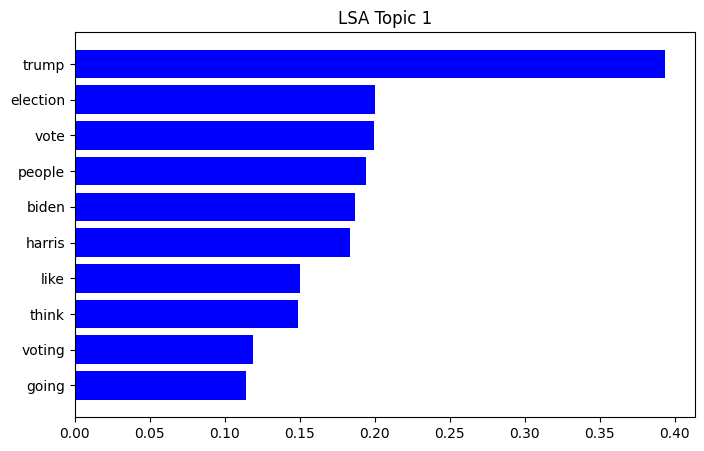

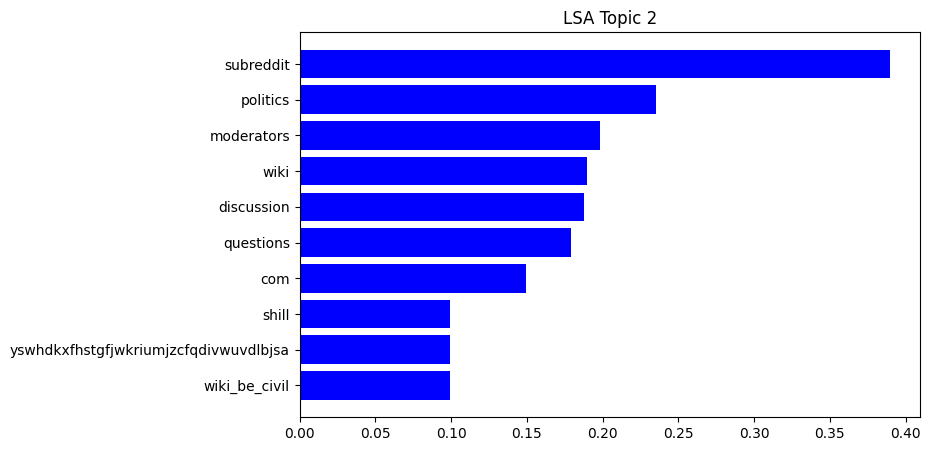

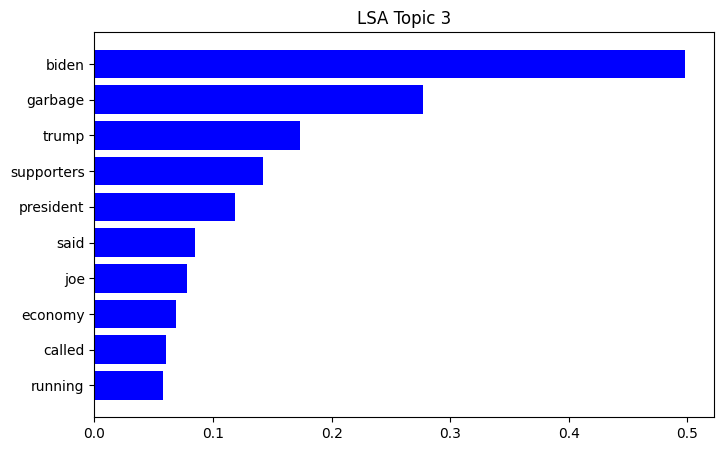

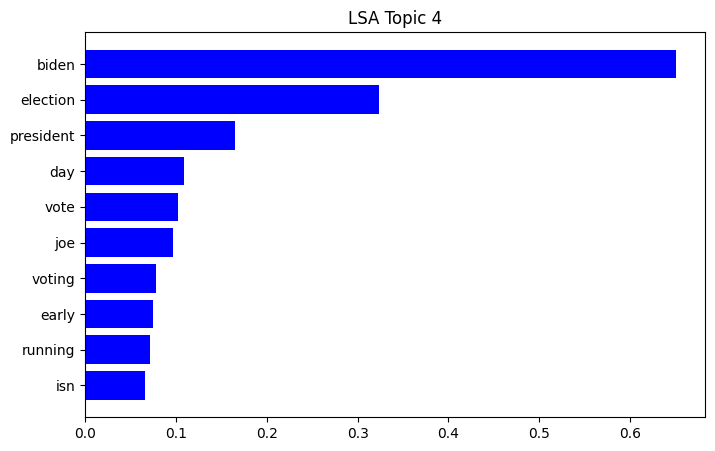

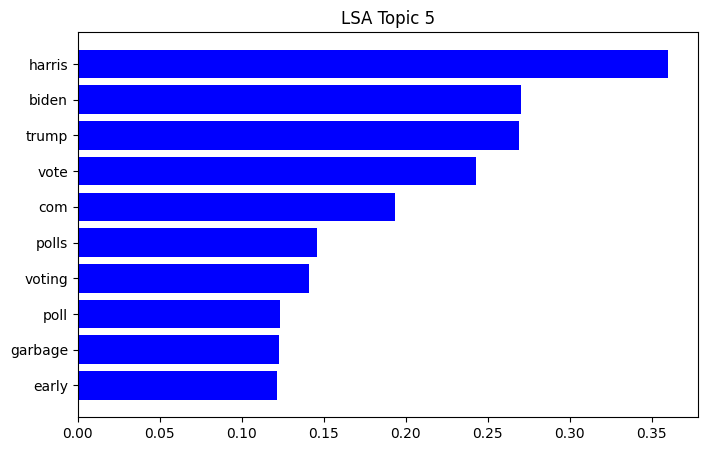

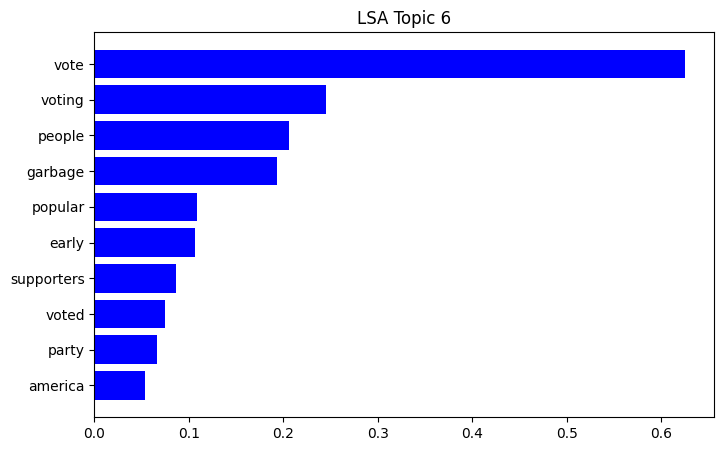

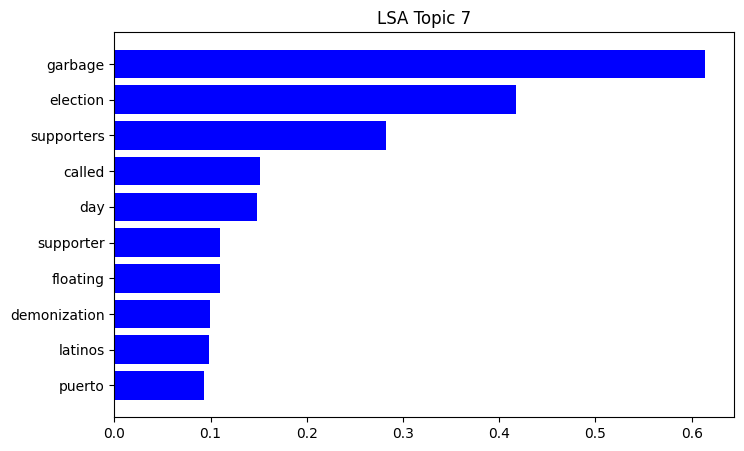

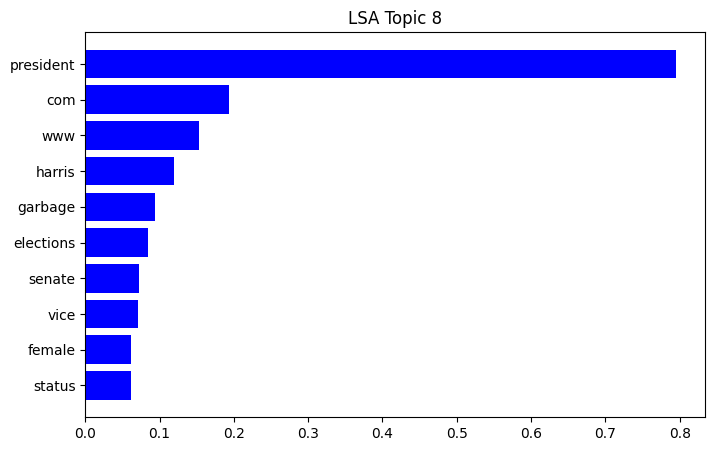

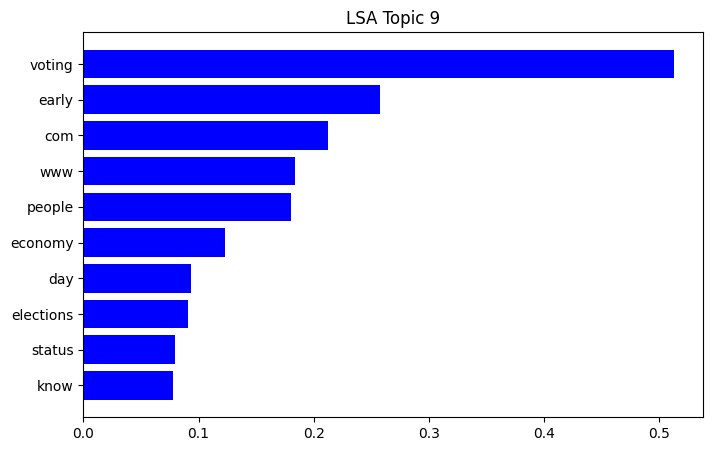

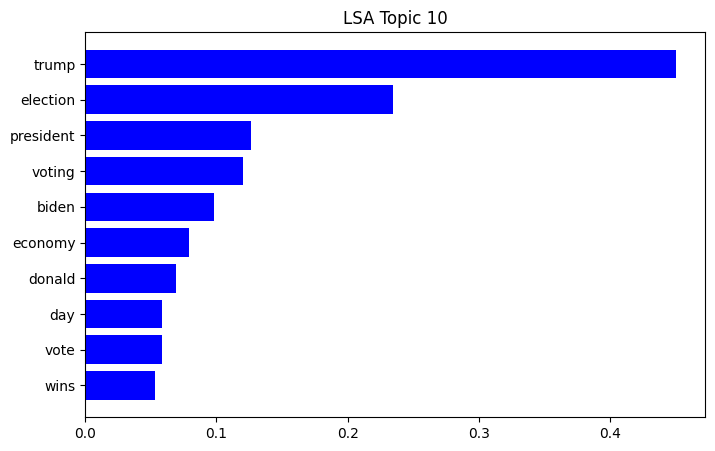

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Bar chart for LSA components
for idx, component in enumerate(lsa.components_):
    terms = np.array(vectorizer.get_feature_names_out())
    top_terms = terms[np.argsort(-component)][:10]
    top_scores = component[np.argsort(-component)][:10]

    plt.figure(figsize=(8, 5))
    plt.barh(top_terms, top_scores, color='blue')
    plt.title(f"LSA Topic {idx+1}")
    plt.gca().invert_yaxis()
    plt.show()


In [ ]:
# Non-Negative Matrix Factorization (NMF)
from sklearn.decomposition import NMF

# Apply NMF
nmf = NMF(n_components=10, random_state=42)
nmf.fit(X)

# Print topics
for idx, topic in enumerate(nmf.components_):
    topic_terms = [terms[i] for i in topic.argsort()[:-6:-1]]
    print(f"Topic {idx}: {topic_terms}")

Topic 0: ['trump', 'win', 'wins', 'donald', 'campaign']
Topic 1: ['subreddit', 'politics', 'moderators', 'wiki', 'discussion']
Topic 2: ['biden', 'joe', 'isn', 'running', 'won']
Topic 3: ['election', 'day', 'win', 'close', 'won']
Topic 4: ['vote', 'popular', 'electoral', 'votes', 'won']
Topic 5: ['people', 'don', 'economy', 'americans', 'time']
Topic 6: ['garbage', 'supporters', 'called', 'floating', 'supporter']
Topic 7: ['president', 'running', 'vice', 'senate', 'female']
Topic 8: ['harris', 'polls', 'com', 'poll', 'voters']
Topic 9: ['voting', 'mail', 'voted', 'republicans', 'party']


In [ ]:
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')  # Download tokenizer data
nltk.download('punkt_tab')


vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()

W = nmf.fit_transform(tfidf_matrix)  # Document-topic matrix
H = nmf.components_  # Topic-word matrix

def get_top_words(topic_idx, n_words=5):
    """Returns the top n words for a given topic index."""
    word_indices = H[topic_idx].argsort()[-n_words:][::-1]
    return [feature_names[i] for i in word_indices]

def get_topic_sentences(documents, top_words):
    """Finds sentences belonging to a given topic based on word overlap."""
    topic_sentences = []
    for doc in documents:
        sentences = sent_tokenize(doc)
        for sentence in sentences:
            if any(word in sentence.lower() for word in top_words):
                topic_sentences.append(sentence)
    return topic_sentences

# Step 5: Print sentences grouped by topic
topic_sentences_dict = {}



for topic_idx in range(10):
    top_words = get_top_words(topic_idx)
    topic_sentences_dict[f"Topic {topic_idx + 1}"] = get_topic_sentences(documents, top_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
topic_sentences_dict.keys()

dict_keys(['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7', 'Topic 8', 'Topic 9', 'Topic 10'])

In [ ]:
# Hierarchical Dirichlet Process (HDP)
from gensim.models import HdpModel

# Build HDP model
hdp_model = HdpModel(corpus, id2word=dictionary)

# Print topics
for idx, topic in enumerate(hdp_model.print_topics(num_topics=2)):
    print(f"Topic {idx}: {topic}")

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 0: (0, '0.020*trump + 0.019*i + 0.008*people + 0.007*election + 0.007*the + 0.006*would + 0.005*like + 0.005*harris + 0.005*biden + 0.005*vote')
Topic 1: (1, '0.020*i + 0.019*trump + 0.008*people + 0.007*the + 0.006*election + 0.006*like + 0.006*would + 0.005*vote + 0.005*biden + 0.005*harris')


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


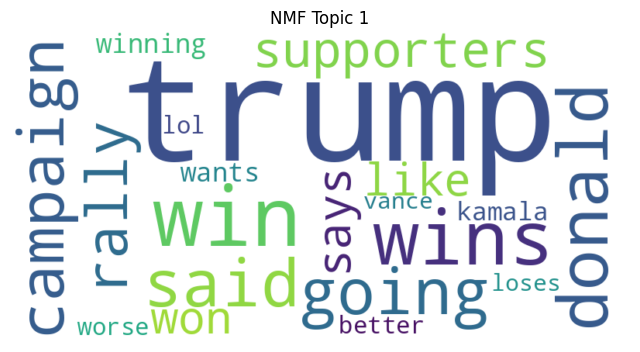

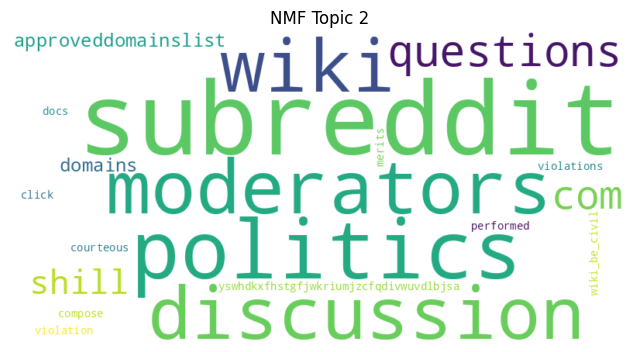

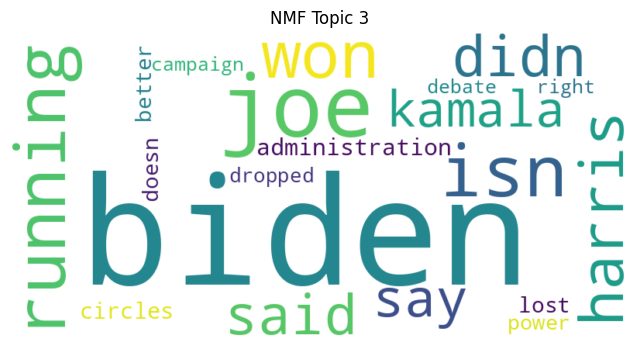

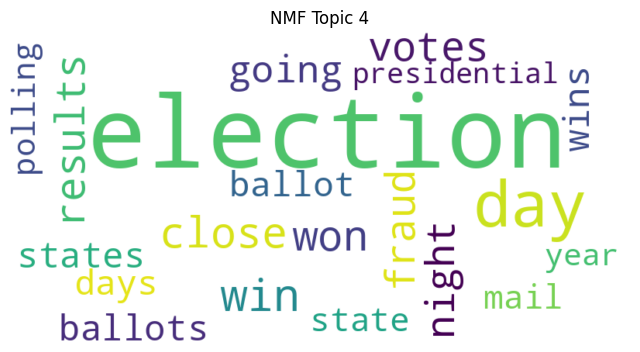

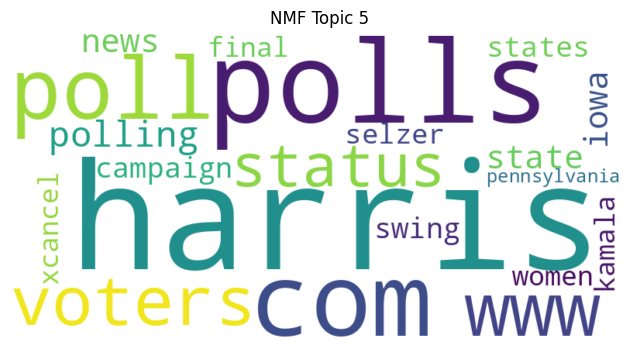

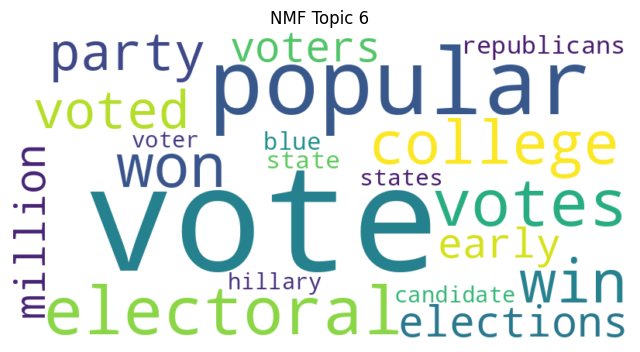

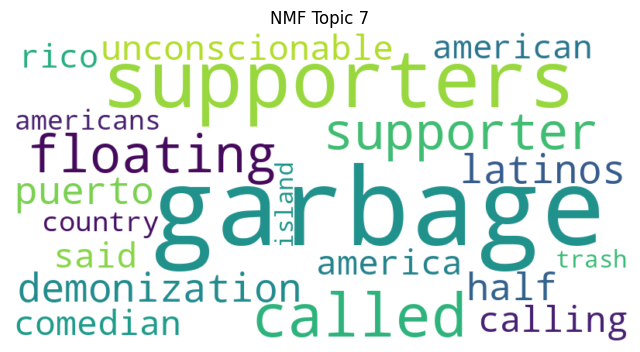

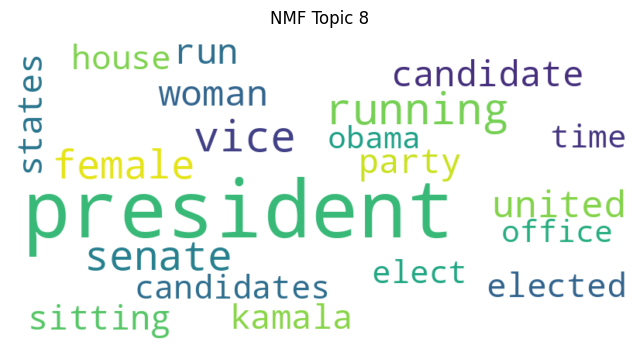

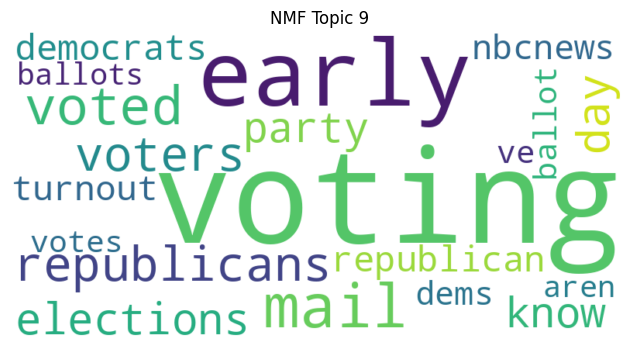

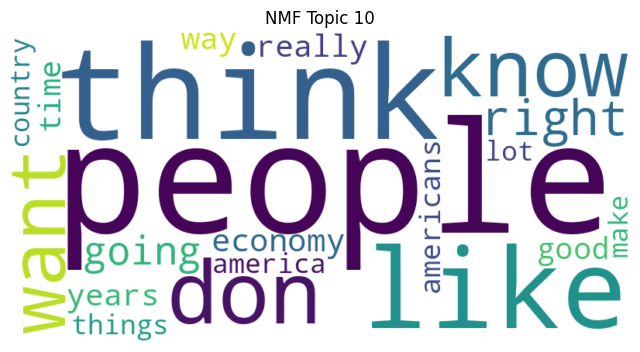

In [ ]:
from wordcloud import WordCloud

# Generate word clouds for NMF topics
for idx, topic in enumerate(nmf.components_):
    terms = vectorizer.get_feature_names_out()
    word_freqs = {terms[i]: topic[i] for i in topic.argsort()[:-21:-1]}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freqs)

    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"NMF Topic {idx+1}")
    plt.show()


In [ ]:
!pip install sentence_transformers
!pip install hdbscan -q
!pip install keybert -q
!pip install bertopic -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.5 MB/s eta 0:00:00


In [ ]:
from hdbscan import HDBSCAN
from bertopic import BERTopic

In [ ]:
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from umap import UMAP

from sklearn.feature_extraction.text import CountVectorizer
from keybert import KeyBERT

kw_model = KeyBERT()
keywords = kw_model.extract_keywords(documents, use_mmr=True, diversity=0.8, stop_words=None)

vocabulary = [k[0] for keyword in keywords for k in keyword]
vocabulary = list(set(vocabulary))

vectorizer_model = CountVectorizer(ngram_range=(1, 2),vocabulary=vocabulary,min_df=0.05,max_df=0.65)

sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = sentence_model.encode(documents, show_progress_bar=True)

Batches:   0%|          | 0/544 [00:00<?, ?it/s]

In [ ]:
from hdbscan import HDBSCAN
from sklearn.decomposition import PCA
import numpy as np

umap_model = UMAP(n_neighbors=10, n_components=6, min_dist=0.0, metric='cosine')

hdbscan_model = HDBSCAN(min_cluster_size=95, metric='euclidean', prediction_data=True)
topic_model = BERTopic(language="multilingual", hdbscan_model=hdbscan_model, vectorizer_model=vectorizer_model, umap_model=umap_model)
topics, probs = topic_model.fit_transform(documents, embeddings=embeddings)

In [ ]:
topic_model.visualize_topics()

In [ ]:
# Reduce dimensionality of embeddings, this step is optional
reduced_embeddings = umap_model.fit_transform(embeddings)

# Run the visualization with the original embeddings
# topic_model.visualize_documents(piece['sentences'], embeddings=embeddings)

# Or, if you have reduced the original embeddings already:
topic_model.visualize_documents(documents, reduced_embeddings=reduced_embeddings)

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,6431,-1_trump_election_harris_vote,"[trump, election, harris, vote, people, the, i...",[Seems time revisit PA math I days ago If appl...
1,0,3803,0_trump_biden_garbage_people,"[trump, biden, garbage, people, he, it, the, d...","[This stupid It people tell difference ""is"" ""a..."
2,1,888,1_economy_inflation_trump_pandemic,"[economy, inflation, trump, pandemic, economic...",[No Trump inherited time fourth unbroken strin...
3,2,866,2_israel_gaza_genocide_war,"[israel, gaza, genocide, war, palestinians, mu...",[Hamas real command structure loose collection...
4,3,691,3_court_trump_supreme_president,"[court, trump, supreme, president, the, power,...",[SCOTUS told Trump courts counts official act ...
5,4,622,4_election_day_vote_mail,"[election, day, vote, mail, voting, elections,...",[Less In Trump voters chose polls person elect...
6,5,618,5_kamala_she_trump_biden,"[kamala, she, trump, biden, people, it, electi...",[Would vote matter Biden current president Kam...
7,6,445,6_polls_polling_pollsters_trump,"[polls, polling, pollsters, trump, poll, the, ...",[Those ignore Most pollsters Republican funded...
8,7,348,7_blue_pa_red_nc,"[blue, pa, red, nc, win, texas, az, election, ...",[That saying look polls disagree PA Trump curr...
9,8,292,8_fraud_election_stolen_steal,"[fraud, election, stolen, steal, rigged, evide...",[It amazes essentially fraud widespread fraud ...


# saving the topic modeling of the bertopic for sentiment analysis

In [ ]:
topic_info = topic_model.get_topic_info()

# Extract the 'Name' column which contains the topic names
topic_names = topic_info['Name'].tolist()

# Print the list of topic names
print(topic_names)

['-1_trump_election_harris_vote', '0_trump_biden_garbage_people', '1_economy_inflation_trump_pandemic', '2_israel_gaza_genocide_war', '3_court_trump_supreme_president', '4_election_day_vote_mail', '5_kamala_she_trump_biden', '6_polls_polling_pollsters_trump', '7_blue_pa_red_nc', '8_fraud_election_stolen_steal', '9_harris_trump_win_wins', '10_women_abortion_woman_vote', '11_betting_odds_market_bet', '12_russia_thing_russian_putin', '13_musk_elon_bezos_money', '14_subreddit_please_politics_wiki', '15_iowa_poll_selzer_harris', '16_border_bill_immigration_immigrants', '17_trump_win_wins_election', '18_harris_biden_trump_campaign', '19_signs_sign_harris_flags', '20_keys_lichtman_popular_predicting', '21_rally_rallies_events_trump']


In [ ]:
# Map documents to topics
topic_df = pd.DataFrame({"Document": documents, "Topic": topics})

# Group documents by topic
grouped_topics = topic_df.groupby("Topic")["Document"].apply(list)

a= {}
for topic, sentences in grouped_topics.items():
    print(topic)
    a[topic_names[topic+1]]=[]
# Print sentences for each topic
for topic, sentences in grouped_topics.items():
    for sentence in sentences:
        a[topic_names[topic+1]].append(sentence)

# Check outliers (optional)
outliers = topic_df[topic_df["Topic"] == -1]["Document"].tolist()


-1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


In [ ]:
a.keys()

dict_keys(['-1_trump_election_harris_vote', '0_trump_biden_garbage_people', '1_economy_inflation_trump_pandemic', '2_israel_gaza_genocide_war', '3_court_trump_supreme_president', '4_election_day_vote_mail', '5_kamala_she_trump_biden', '6_polls_polling_pollsters_trump', '7_blue_pa_red_nc', '8_fraud_election_stolen_steal', '9_harris_trump_win_wins', '10_women_abortion_woman_vote', '11_betting_odds_market_bet', '12_russia_thing_russian_putin', '13_musk_elon_bezos_money', '14_subreddit_please_politics_wiki', '15_iowa_poll_selzer_harris', '16_border_bill_immigration_immigrants', '17_trump_win_wins_election', '18_harris_biden_trump_campaign', '19_signs_sign_harris_flags', '20_keys_lichtman_popular_predicting', '21_rally_rallies_events_trump'])

In [ ]:
topic_info = topic_model.get_topic_info()

# Extract the 'Name' column which contains the topic names
topic_names = topic_info['Name'].tolist()

# Print the list of topic names
print(topic_names)

['-1_trump_election_harris_vote', '0_trump_biden_garbage_people', '1_economy_inflation_trump_pandemic', '2_israel_gaza_genocide_war', '3_court_trump_supreme_president', '4_election_day_vote_mail', '5_kamala_she_trump_biden', '6_polls_polling_pollsters_trump', '7_blue_pa_red_nc', '8_fraud_election_stolen_steal', '9_harris_trump_win_wins', '10_women_abortion_woman_vote', '11_betting_odds_market_bet', '12_russia_thing_russian_putin', '13_musk_elon_bezos_money', '14_subreddit_please_politics_wiki', '15_iowa_poll_selzer_harris', '16_border_bill_immigration_immigrants', '17_trump_win_wins_election', '18_harris_biden_trump_campaign', '19_signs_sign_harris_flags', '20_keys_lichtman_popular_predicting', '21_rally_rallies_events_trump']


In [ ]:
import json

filename = "data.json"
with open(filename, 'w') as json_file:
    json.dump(a, json_file, indent=4)

In [ ]:
import pandas as pd

# Get topic information
topic_info = topic_model.get_topic_info()

# Save topic information to a CSV file
csv_file_path = "topic_info.csv"
topic_info.to_csv(csv_file_path, index=False)

print(f"Topic information saved to {csv_file_path}")

Topic information saved to topic_info.csv


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# some junk and testings

In [ ]:
# LDA (Scikit-Learn Implementation)
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Preprocess data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# Apply LDA
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(X)

# Print topics
for idx, topic in enumerate(lda.components_):
    topic_terms = [terms[i] for i in topic.argsort()[:-6:-1]]
    print(f"Topic {idx}: {topic_terms}")

In [ ]:
# Metrics for Topic Modeling

# Perplexity
perplexity = lda_model.log_perplexity(corpus)
print(f"Model Perplexity: {perplexity}")

# Coherence
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f"Coherence Score: {coherence_lda}")

# Topic Diversity

def topic_diversity(topics):
    unique_words = set()
    total_words = 0
    for topic in topics:
        words = topic.split("+")
        total_words += len(words)
        unique_words.update(words)
    return len(unique_words) / total_words

topics = [t[1] for t in lda_model.print_topics()]
print(f"Topic Diversity: {topic_diversity(topics)}")

In [ ]:
import json

with open("final_results.json", "r") as f:
    data = json.load(f)

In [ ]:
a = []
for x in data:
  a.append((x.count(0)/len(x), x.count(1)/len(x), x.count(2)/len(x)))

In [ ]:
a

[(0.07467788587956876, 0.6676308177754404, 0.2576912963449908),
 (0.11711711711711711, 0.6880630630630631, 0.19481981981981983),
 (0.06581986143187067, 0.581986143187067, 0.35219399538106233),
 (0.09117221418234443, 0.7424023154848046, 0.16642547033285093),
 (0.07234726688102894, 0.7893890675241158, 0.1382636655948553),
 (0.11003236245954692, 0.5194174757281553, 0.3705501618122977),
 (0.11685393258426967, 0.4853932584269663, 0.39775280898876403),
 (0.07471264367816093, 0.4425287356321839, 0.4827586206896552),
 (0.0958904109589041, 0.6712328767123288, 0.2328767123287671),
 (0.08029197080291971, 0.39416058394160586, 0.5255474452554745)]

In [ ]:
import json

with open("data.json", "r") as f:
    data = json.load(f)

In [ ]:
for x in list(data.keys())[1:11]:
  print(x)

0_trump_biden_garbage_people
1_economy_inflation_trump_pandemic
2_israel_gaza_genocide_war
3_court_trump_supreme_president
4_election_day_vote_mail
5_kamala_she_trump_biden
6_polls_polling_pollsters_trump
7_blue_pa_red_nc
8_fraud_election_stolen_steal
9_harris_trump_win_wins
